# Lesson 11: Plotting graph with Matplotlib

Version 1.2. Prepared by [Makzan](https://makzan.net). Updated at 2021 March.

In this lesson, we learn to plot graph from data by using Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plotting line chart

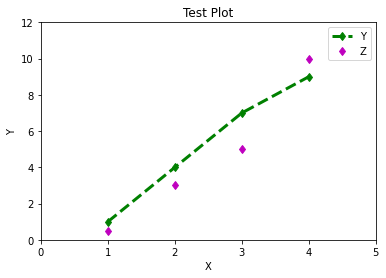

In [2]:
x = range(1,5)
y = [1,4,7,9]
z = [0.5,3,5,10]

plt.figure()

plt.plot(x,y, '--dg', linewidth=3)
plt.plot(x,z, 'dm')
plt.title('Test Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Y', 'Z'])

plt.xlim(0,5)
plt.ylim(0, 12)
plt.show()

There are some available line styles:

- solid `-`
- dashed `--`
- dashdot `-.`
- dotted `:`

For the data point, we can have:

- diamond `d`
- circle `o`
- dot `.`
- square `s`


## Understanding figures and axes

![](fig-axes-from-real-python.png)

Image from [Real Python](https://realpython.com/python-matplotlib-guide/). The post also shares a lot detail configuration on using Matplotlib: https://realpython.com/python-matplotlib-guide/

![](fig-anatomy.png)

Image from [MatPlotLib documentation](https://matplotlib.org/examples/showcase/anatomy.html).

## Plotting chart from plain text file

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


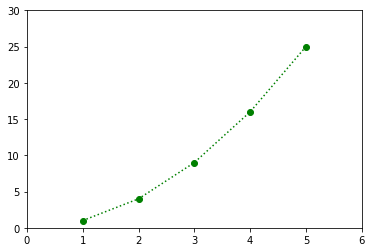

In [3]:
data = np.loadtxt('sample_data.txt', delimiter=',')
data = data.reshape(5,2)

plt.figure()

print(data)

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, ':go')

plt.xlim(0,6)
plt.ylim(0,30)

plt.savefig("sample_figure.png")
plt.show()

In the above code, we also save the the figure into file. Beware the above code will fail if we call `savefig` after `show`. That is because pyplot keeps the **current figure** reference to know which figure, or which axe that we want to configure for each command. And `show` will clear the __current__ figure into empty.

More detail on StackOverflow: https://stackoverflow.com/a/21884187


## Plotting chart from Pandas

Pandas also integrates the `plot` function into DataFrame.

<AxesSubplot:xlabel='Date'>

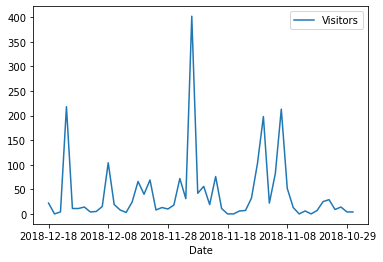

In [4]:
df = pd.read_csv('visitors.csv', names=["Date", "Visitors"])
df = df.set_index("Date")
df.plot()

<AxesSubplot:xlabel='Date'>

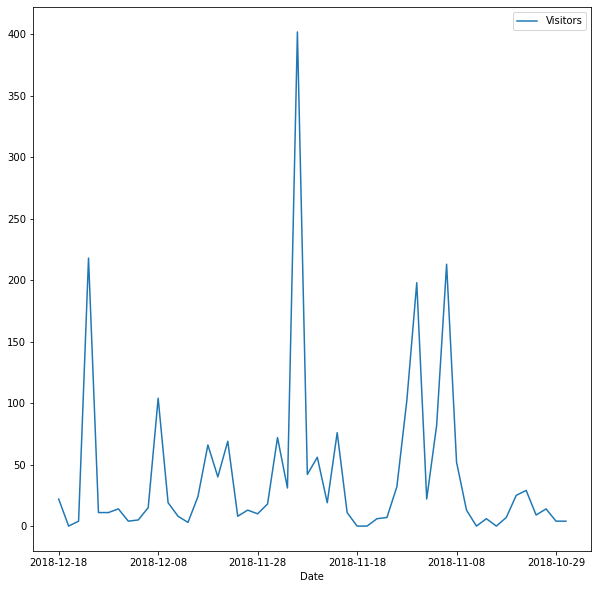

In [5]:
df.plot(kind="line", figsize=(10,10))

<AxesSubplot:xlabel='Date'>

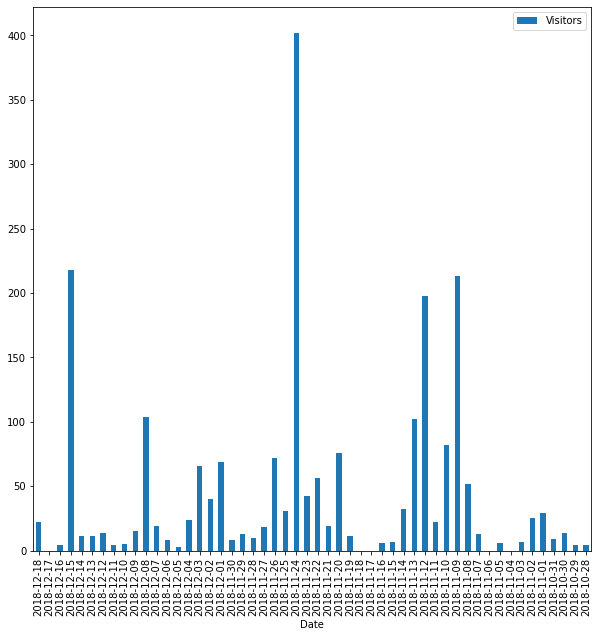

In [6]:
df.plot(kind="bar", figsize=(10,10))

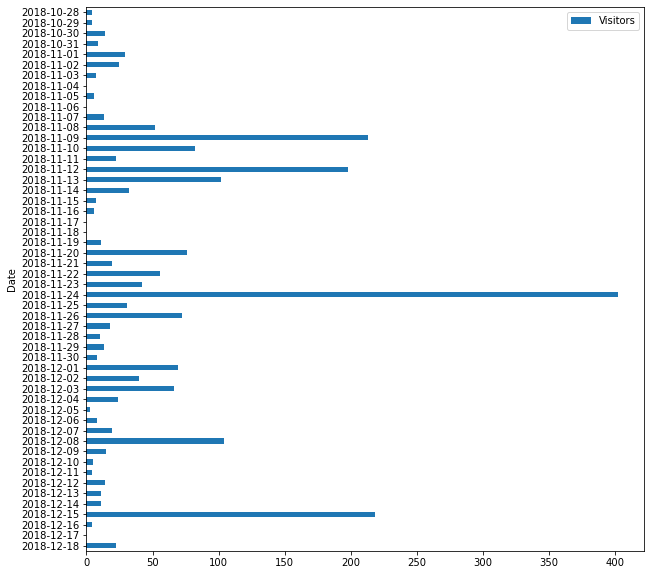

In [7]:
ax = df.plot(kind="barh", figsize=(10,10))

If you need to save the figure from pandas.plot, we need to use `get_figure()` and then `savefig(filename)`.

In [8]:
ax.get_figure().savefig("output.png")

## Plotting pie chart

65.1


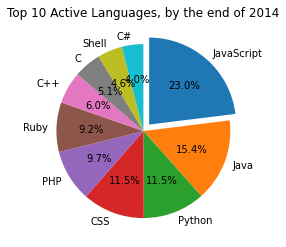

In [9]:
# Top Active Languages by https://githut.info
labels = ['JavaScript', 'Java', 'Python', 'CSS', 'PHP', 'Ruby', 'C++', 'C', 'Shell','C#']

values = [15,10,7.5,7.5,6.3,6,3.9,3.3, 3,2.6]

explodes= np.zeros(len(labels))
explodes[0] = 0.1

print(sum(values))

plt.title("Top 10 Active Languages, by the end of 2014")

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, explode=explodes)

plt.show()

----

## MatPlotLib styles

Beside customizing each line colors ourself, we can use pre-defined styles. The available styles can be found by `plt.style.available`.

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

Then, we can use the style by `with` and `plt.style.context('style-name')`.

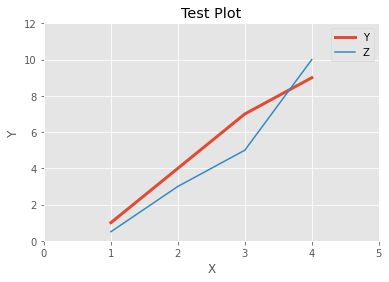

In [12]:
x = range(1,5)
y = [1,4,7,9]
z = [0.5,3,5,10]

with plt.style.context('ggplot'):
    plt.plot(x,y, linewidth=3)
    plt.plot(x,z)
    plt.title('Test Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Y', 'Z'])

    plt.xlim(0,5)
    plt.ylim(0, 12)
    plt.show()

Listing all styles for a line chart:

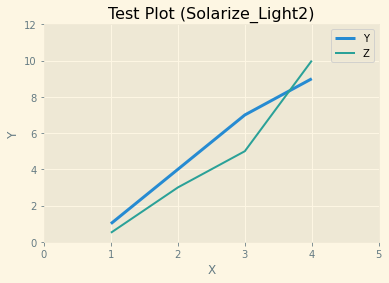

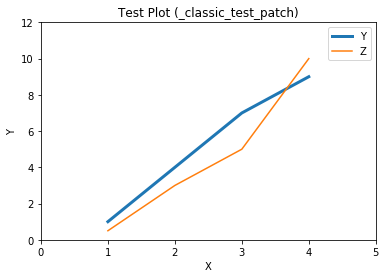

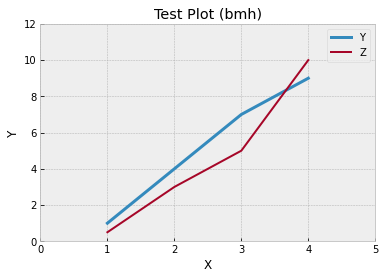

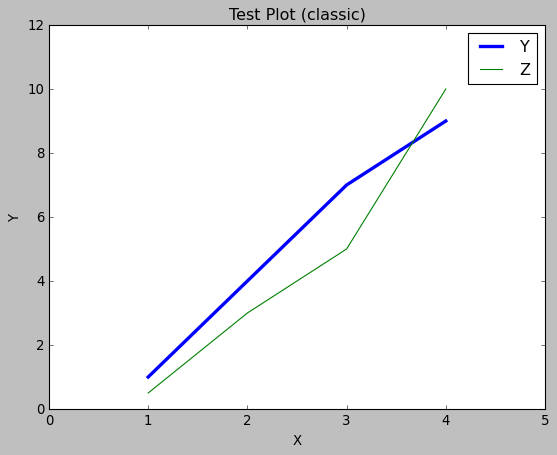

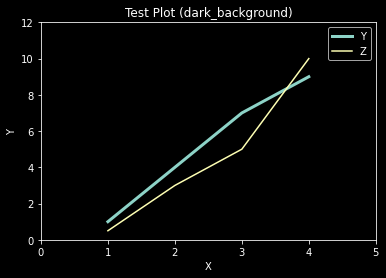

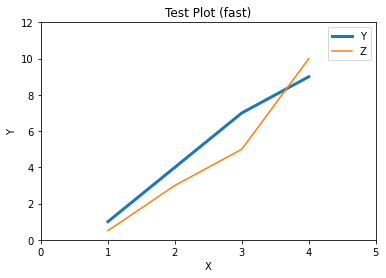

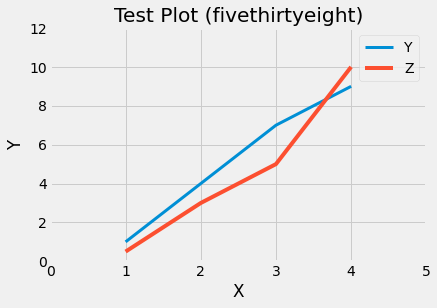

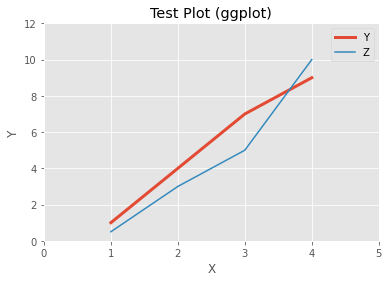

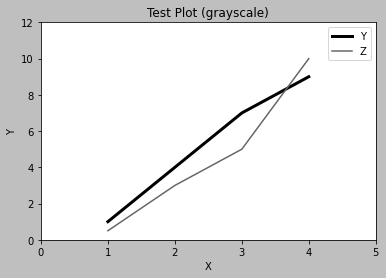

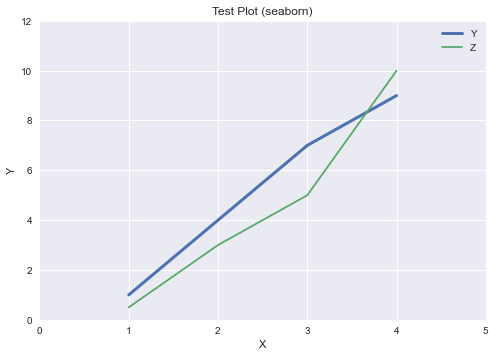

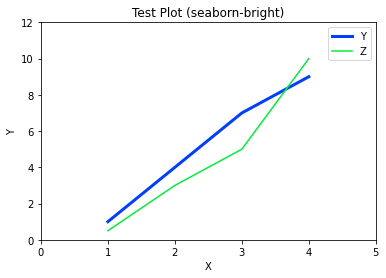

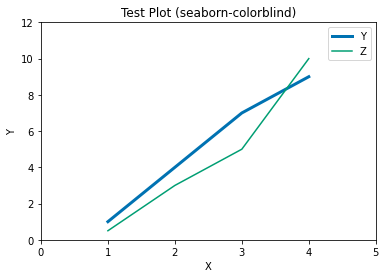

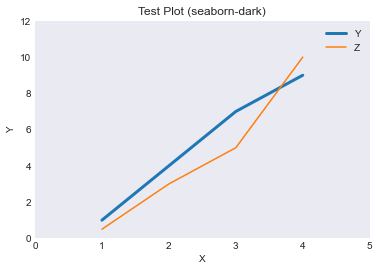

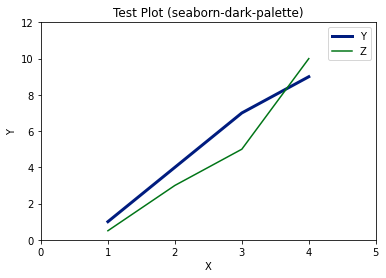

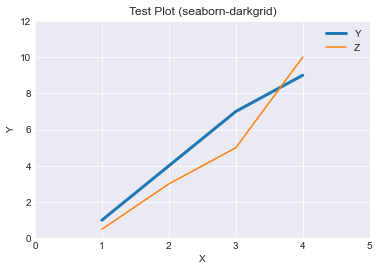

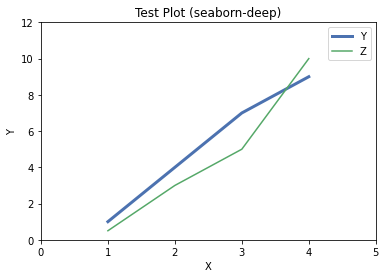

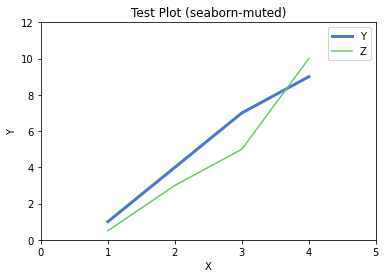

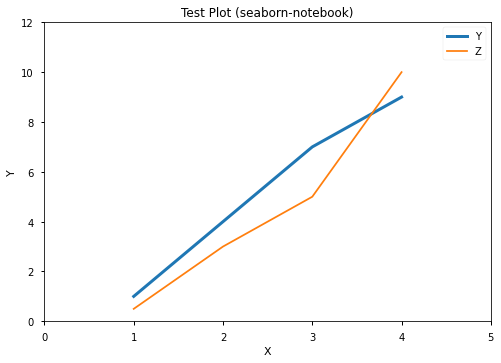

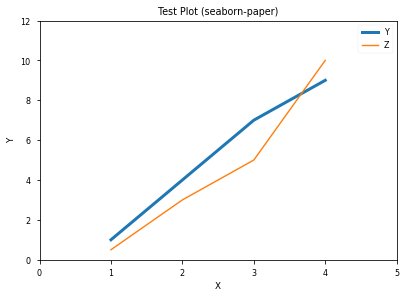

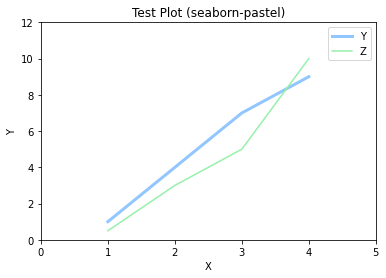

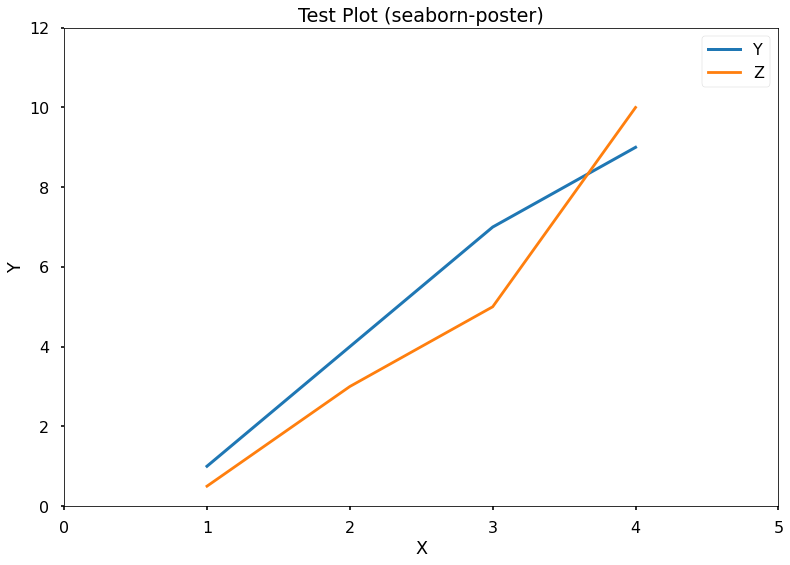

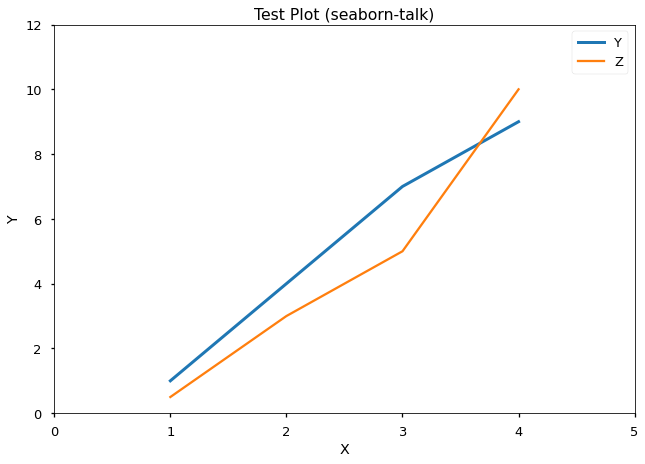

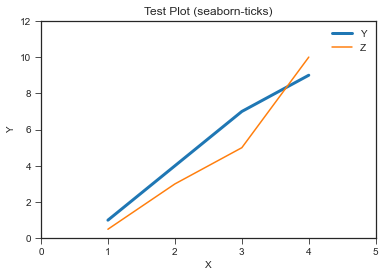

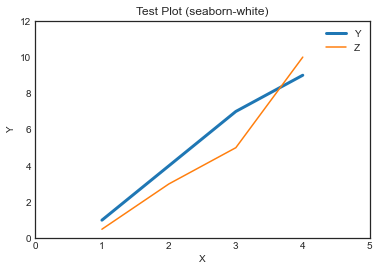

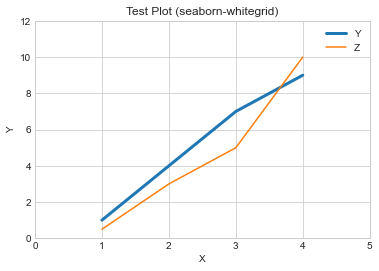

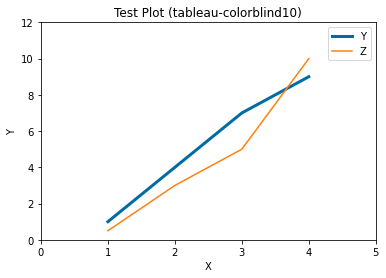

In [13]:
x = range(1,5)
y = [1,4,7,9]
z = [0.5,3,5,10]

for style in plt.style.available:
    with plt.style.context(style):
        plt.plot(x,y, linewidth=3)
        plt.plot(x,z)
        plt.title(f'Test Plot ({style})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend(['Y', 'Z'])

        plt.xlim(0,5)
        plt.ylim(0, 12)
        plt.show()

Listing all styles for a bar chart:

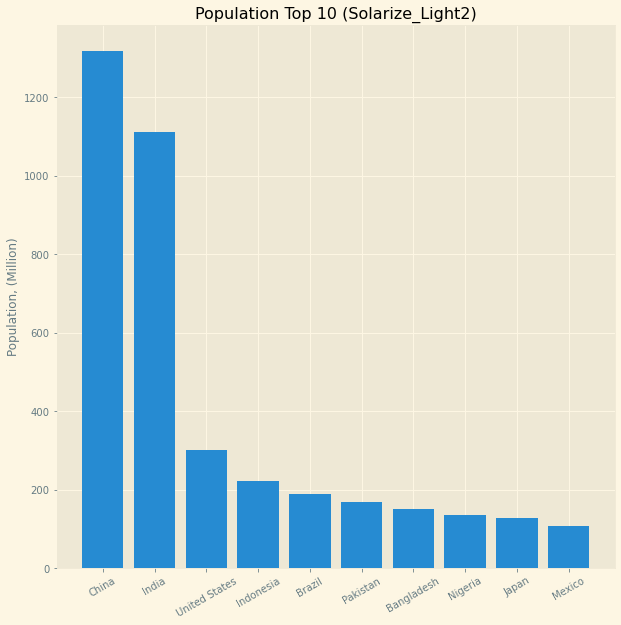

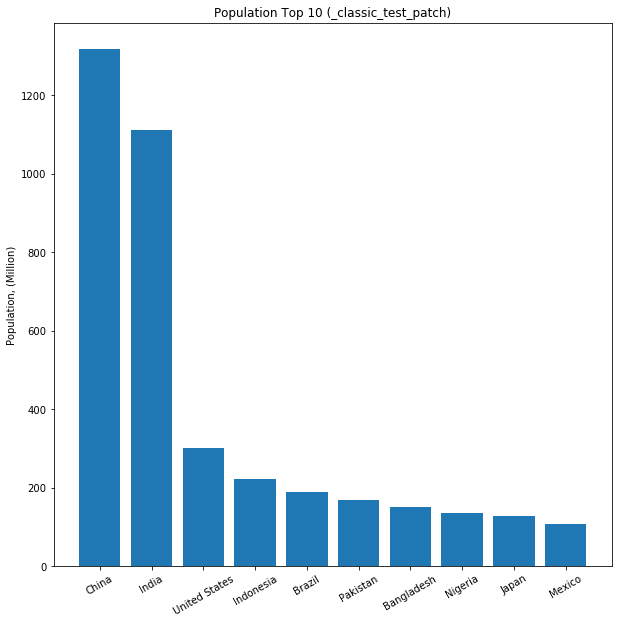

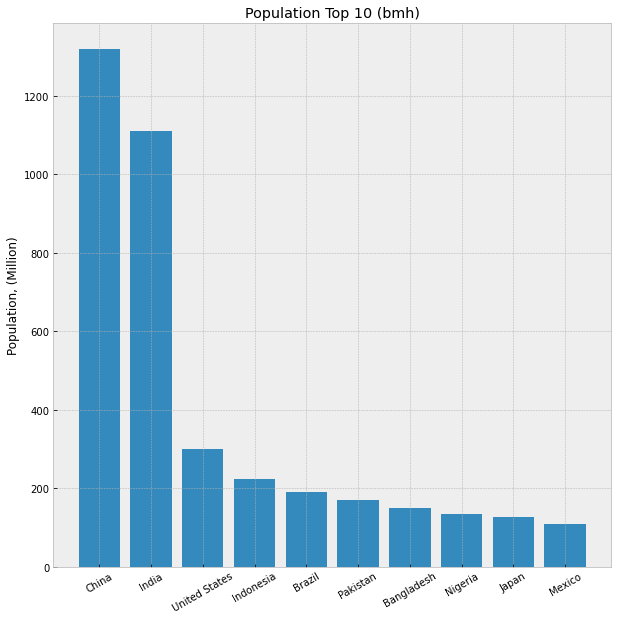

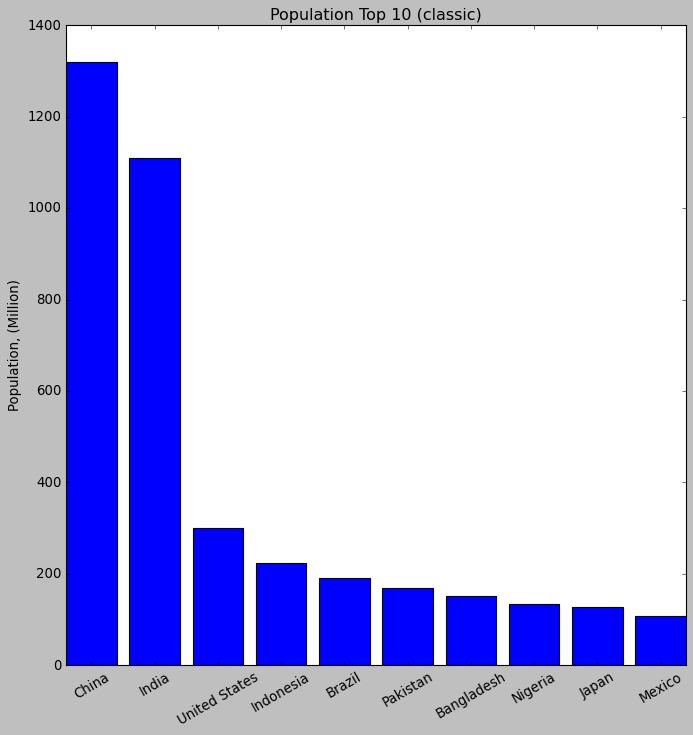

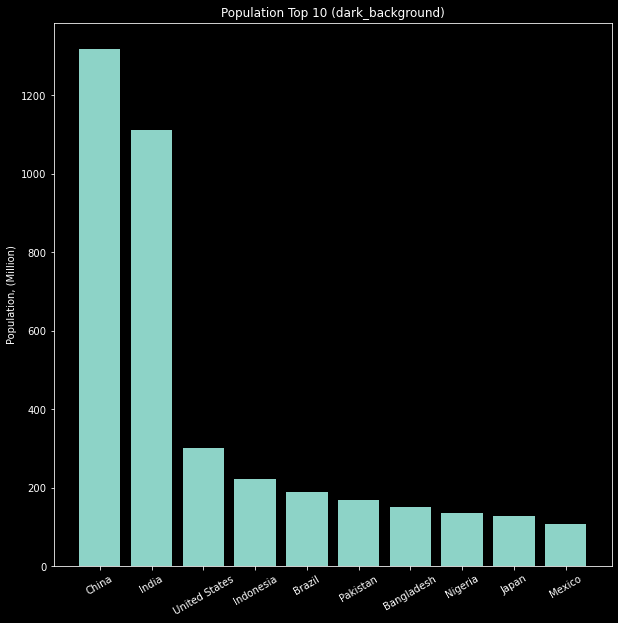

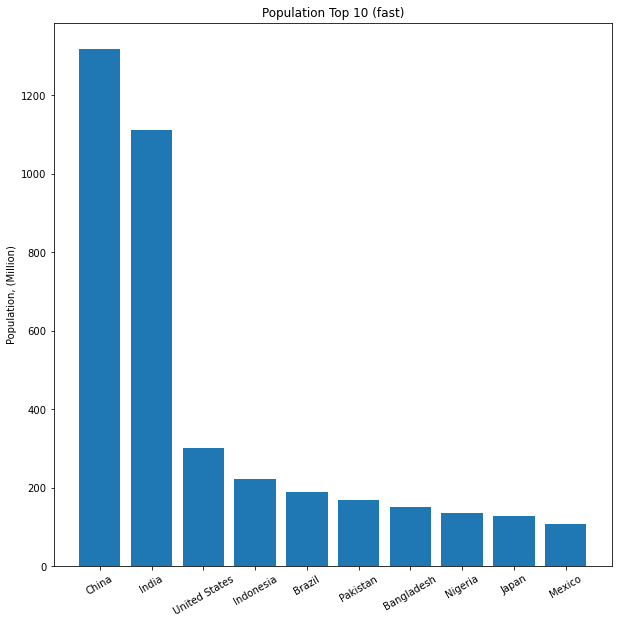

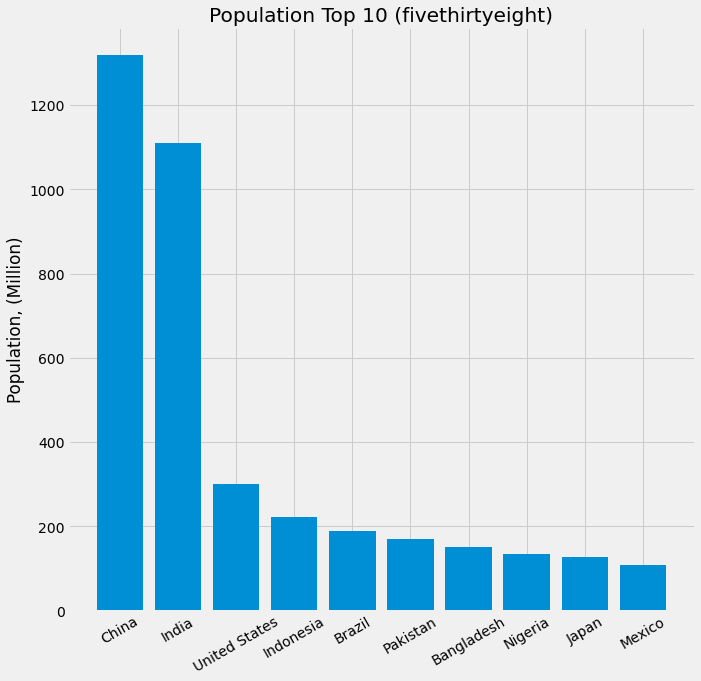

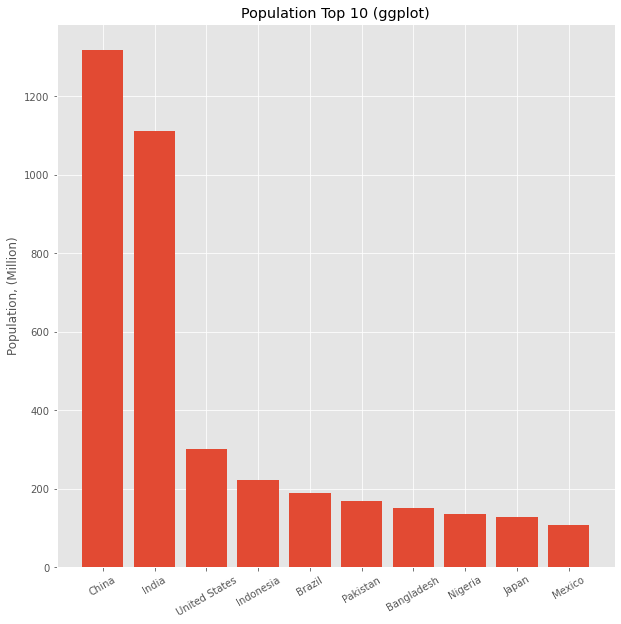

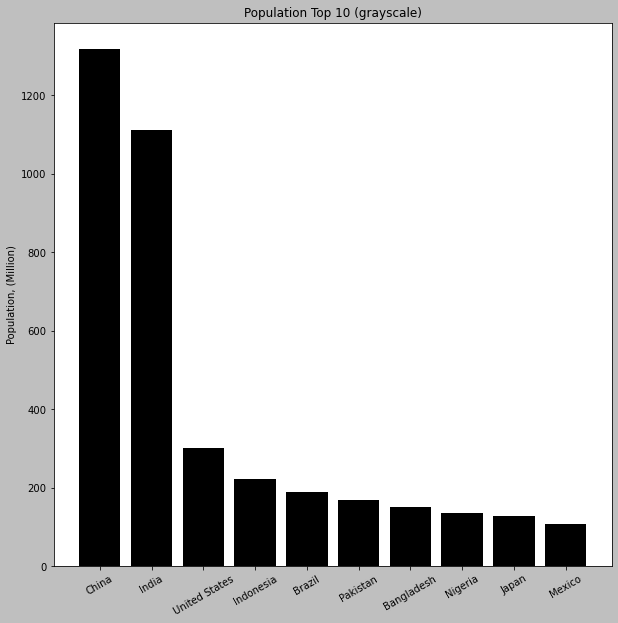

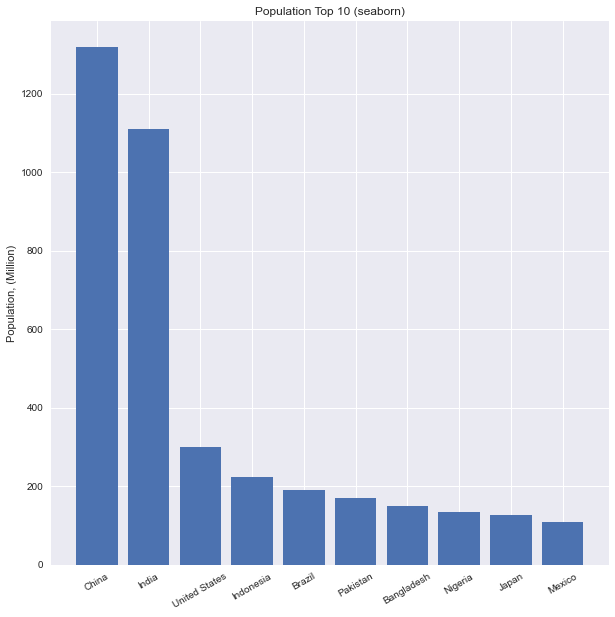

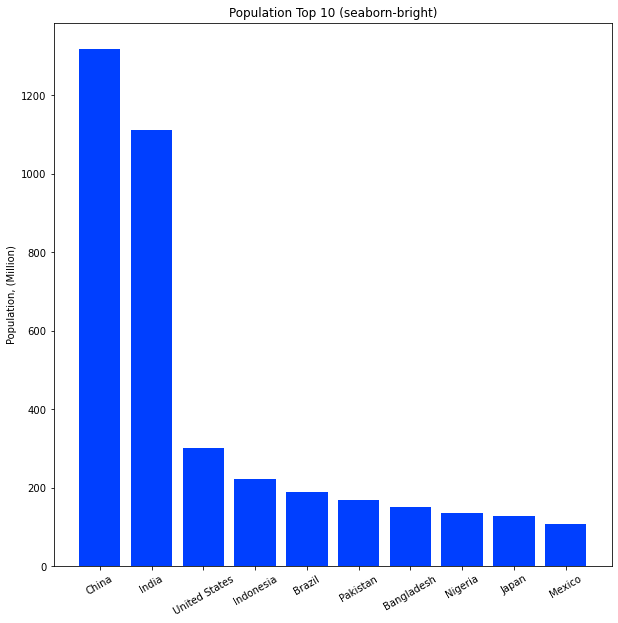

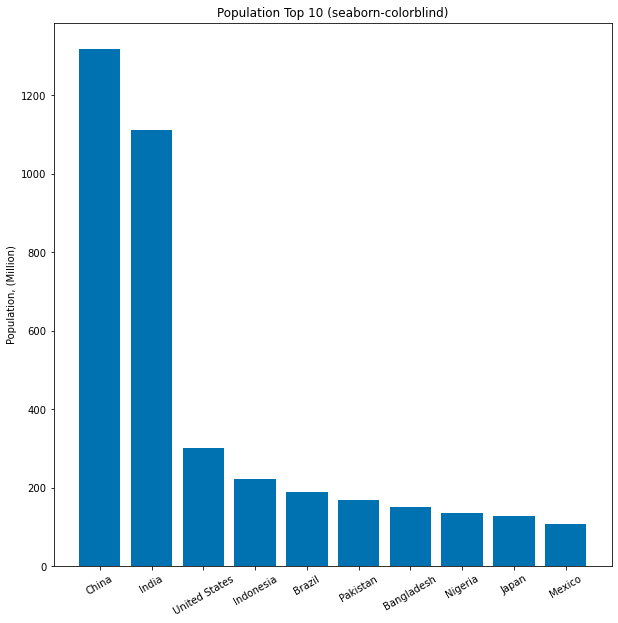

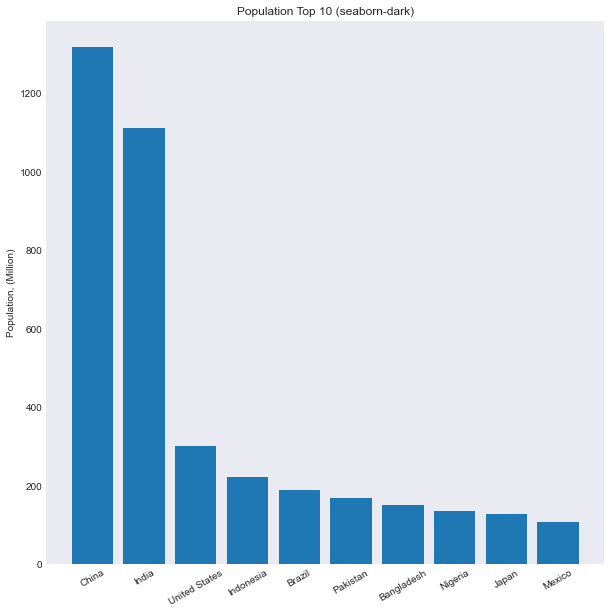

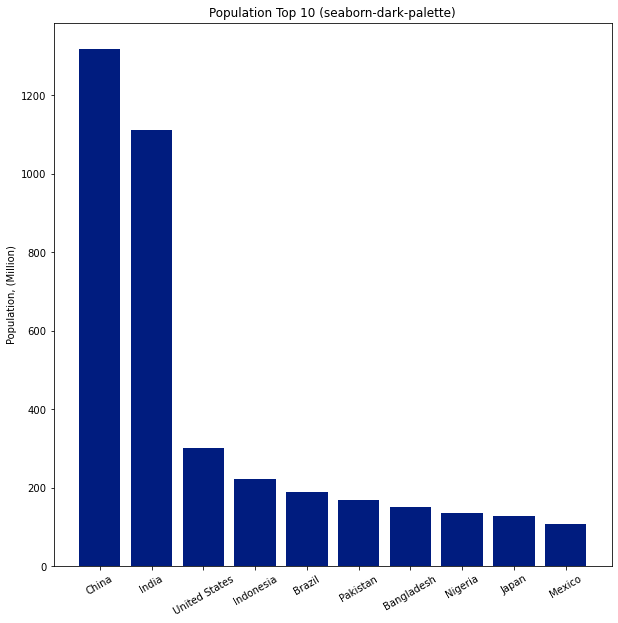

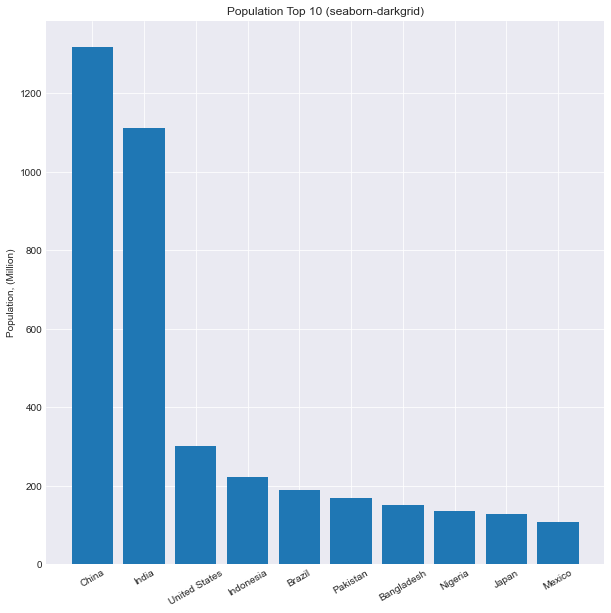

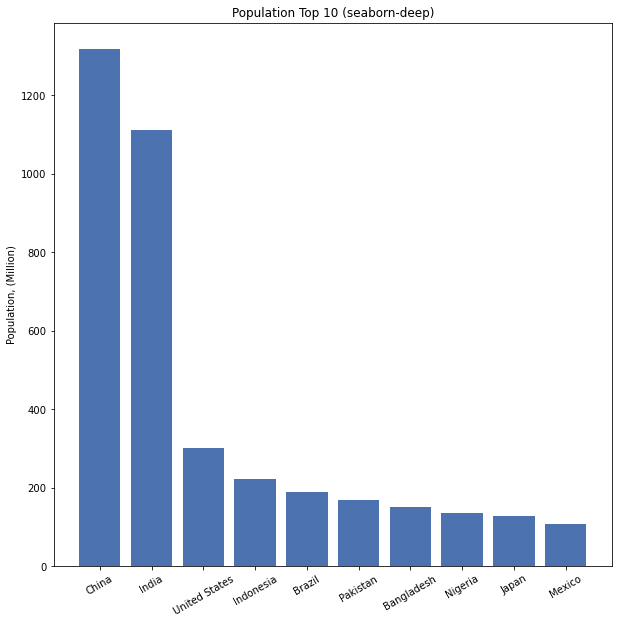

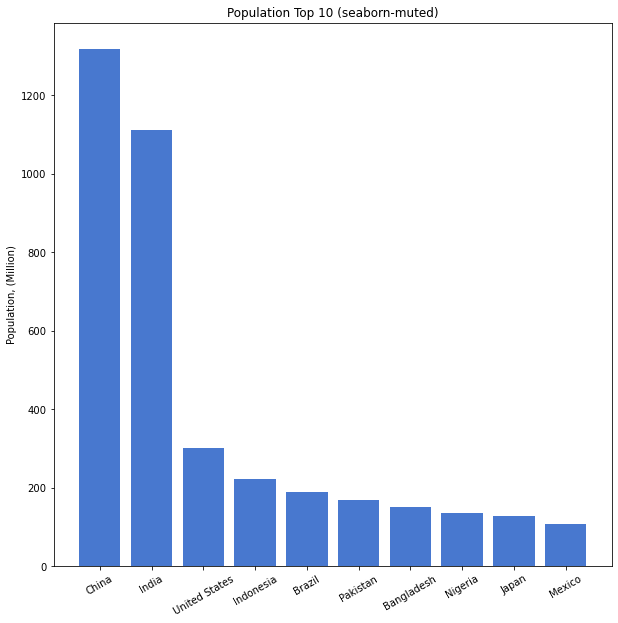

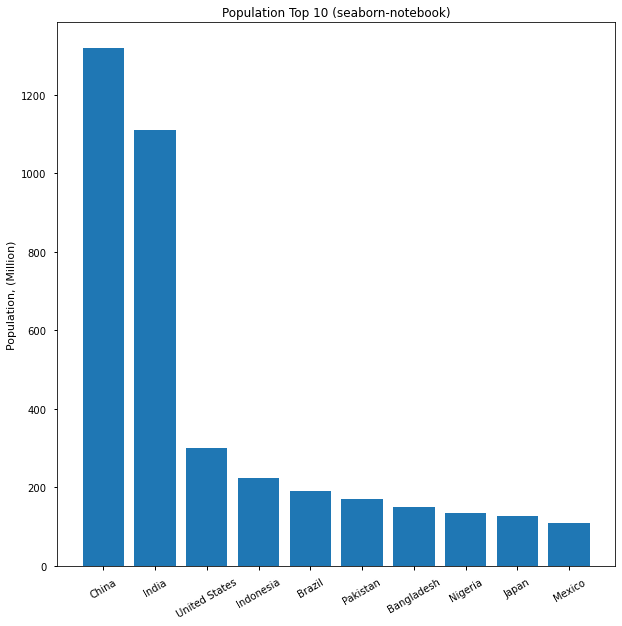

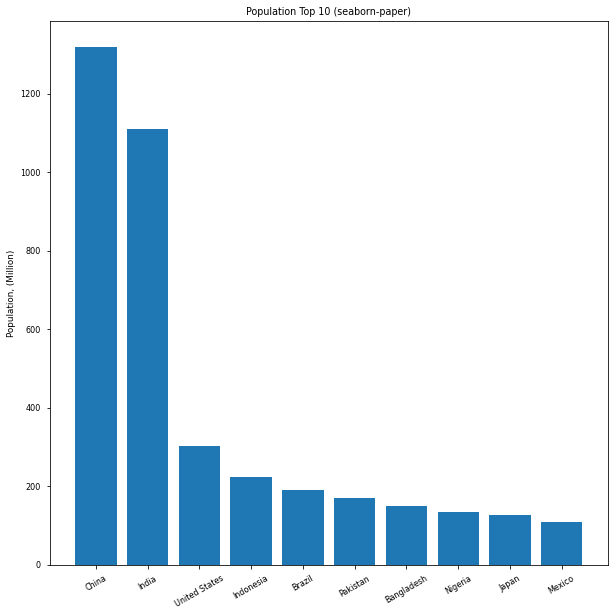

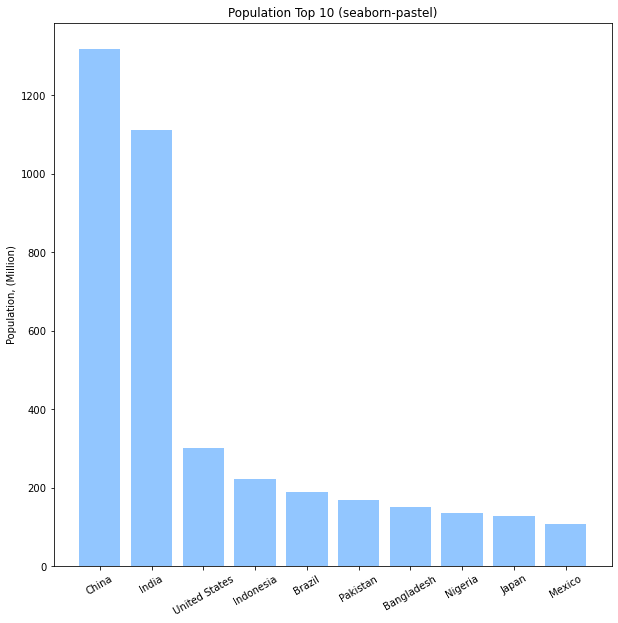

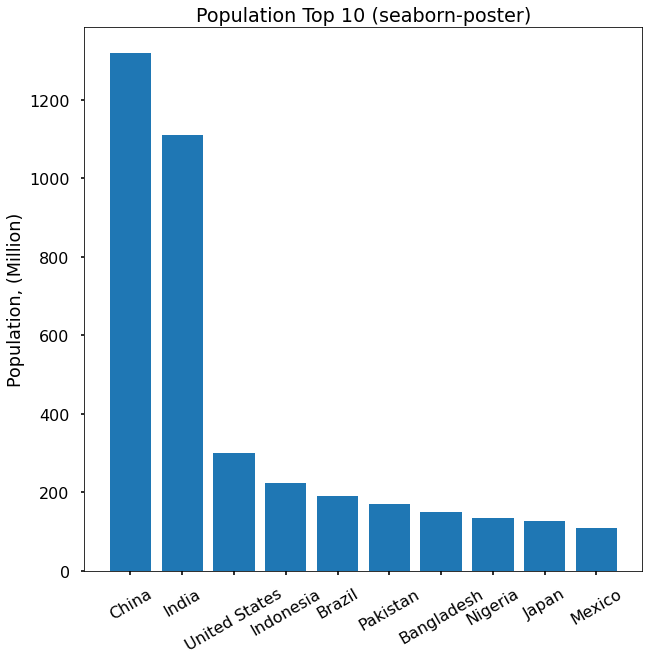

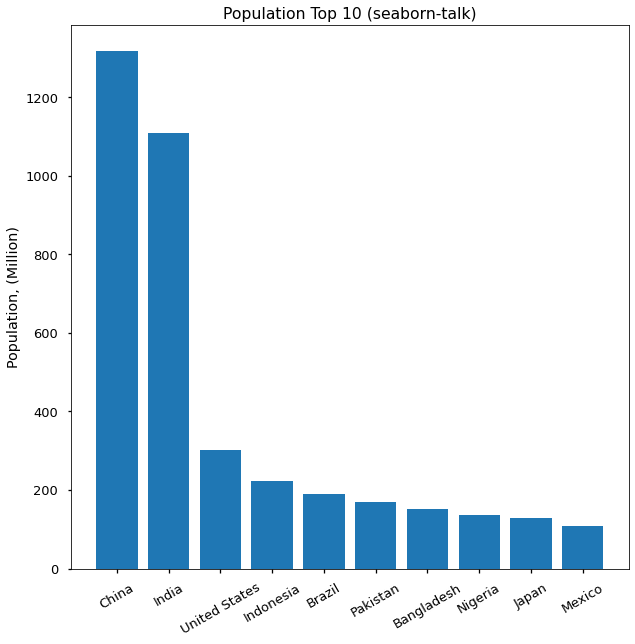

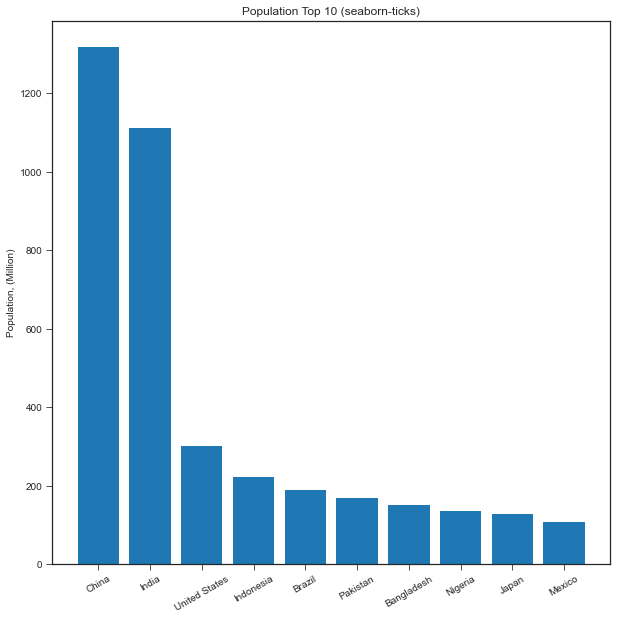

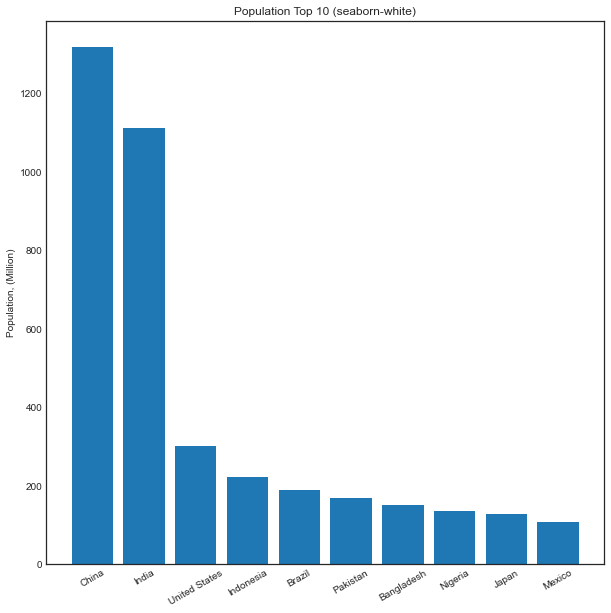

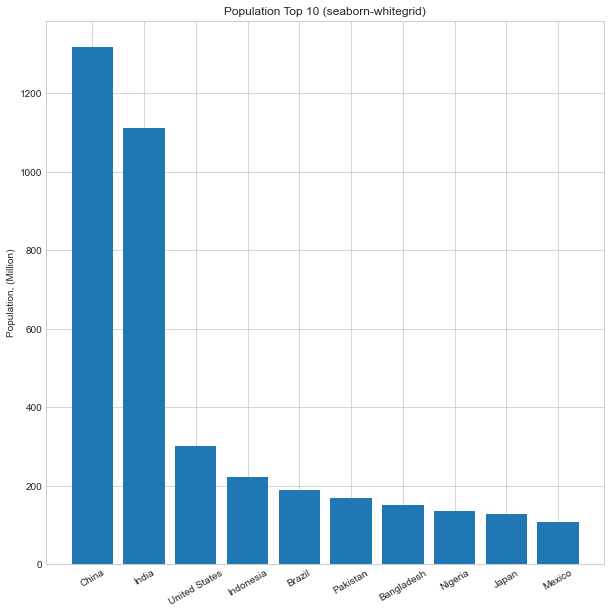

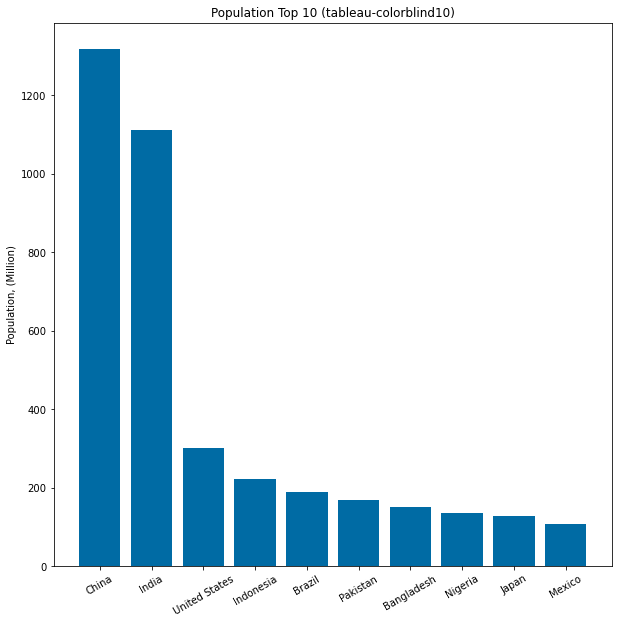

In [14]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000


year_2007 = data[data['year']==2007]

year_2007 = year_2007.sort_values(by='population', ascending=False)


for style in plt.style.available:
    with plt.style.context(style):
        plt.figure(figsize=(10,10))
        plt.xticks(rotation=30)


        plt.ylabel("Population, (Million)")
        plt.bar(year_2007['country'][:10], year_2007['population'][:10])
        plt.title(f"Population Top 10 ({style})")
        plt.show()

----

## Countries and Population dataset

In this example, we explore the countries and population dataset.

In [15]:
dataset = pd.read_csv('countries.csv')

We need to register the following converter explicitly, otherwise, we will get a warning.

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Plotting counties comparation

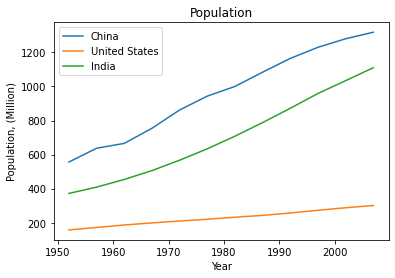

In [17]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000
data['year'] = pd.to_datetime(data['year'], format='%Y')

china_data = data[data['country']=='China']
us_data = data[data['country']=='United States']
india_data = data[data['country']=='India']

# print(china_data, us_data)

plt.plot(china_data['year'], china_data['population'])
plt.plot(us_data['year'], us_data['population'])
plt.plot(india_data['year'], india_data['population'])

plt.legend(['China','United States','India'])

plt.ylabel("Population, (Million)")
plt.xlabel("Year")
plt.title("Population")

plt.show()

### Top 10 countries plotting as at 2007 population

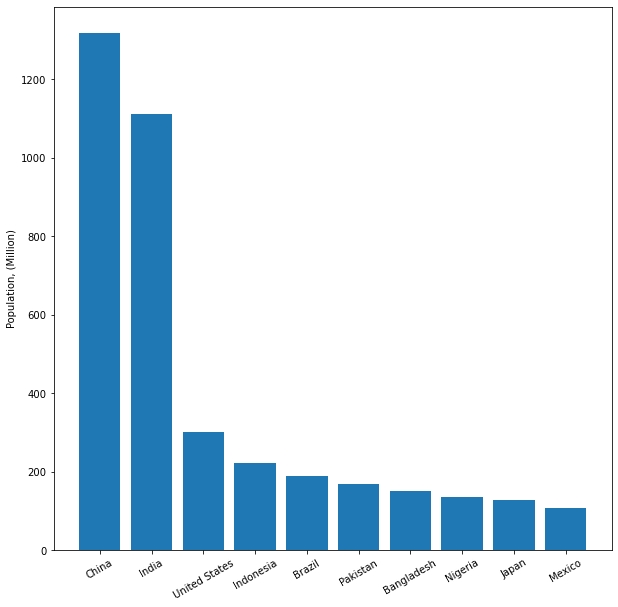

In [18]:
data = pd.read_csv('countries.csv', delimiter=',')

data['population'] = data['population'] / 1000000


year_2007 = data[data['year']==2007]

year_2007 = year_2007.sort_values(by='population', ascending=False)

plt.figure(figsize=(10,10))
plt.xticks(rotation=30)


plt.ylabel("Population, (Million)")
plt.bar(year_2007['country'][:10], year_2007['population'][:10])

plt.show()

### Global plotting year growth globally

year
1952-01-01    2398.406788
1957-01-01    2654.240365
1962-01-01    2887.864036
1967-01-01    3203.829692
1972-01-01    3561.751119
1977-01-01    3913.260611
1982-01-01    4270.935450
1987-01-01    4671.719619
1992-01-01    5090.023342
1997-01-01    5493.575867
2002-01-01    5864.523340
2007-01-01    6227.838885
Name: population, dtype: float64


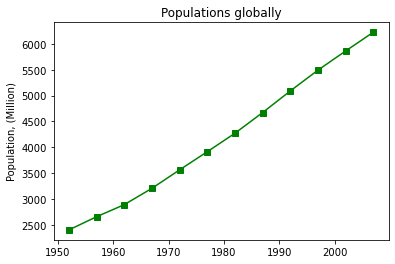

In [19]:
data = pd.read_csv('countries.csv', delimiter=',')
data['year'] = pd.to_datetime(data['year'], format='%Y')

data['population'] = data['population'] / 1000000

by_year = data.groupby('year')


populations = by_year['population'].agg(np.sum)

print(populations)

plt.title("Populations globally")
plt.ylabel("Population, (Million)")
plt.plot(populations, 'g-s')

plt.show()

----

## (From Lab 1) Counting words in Alice in Wonderland

What we can do with `count`? For example, we can count how many times a word appear in a paragraph. For instance:

In [20]:
paragraph = "Hello World. Welcome to the Python course. Here is what you can do with Python."

paragraph.count("Python")

2

The following is chapter 1 of [Alice in the Wonderland](http://www.gutenberg.org/ebooks/928), extracted from [Gutenberg.org](http://www.gutenberg.org/files/928/928-h/928-h.htm).

In [21]:
chapter_1 = """CHAPTER I

Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.

In another moment down went Alice after it, never once considering how in the world she was to get out again.

The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well.

Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs. She took down a jar from one of the shelves as she passed; it was labelled 'ORANGE MARMALADE', but to her great disappointment it was empty: she did not like to drop the jar for fear of killing somebody, so managed to put it into one of the cupboards as she fell past it.

'Well!' thought Alice to herself, 'after such a fall as this, I shall think nothing of tumbling down stairs! How brave they'll all think me at home! Why, I wouldn't say anything about it, even if I fell off the top of the house!' (Which was very likely true.)

Down, down, down. Would the fall never come to an end! 'I wonder how many miles I've fallen by this time?' she said aloud. 'I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down, I think--' (for, you see, Alice had learnt several things of this sort in her lessons in the schoolroom, and though this was not a very good opportunity for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) '--yes, that's about the right distance--but then I wonder what Latitude or Longitude I've got to?' (Alice had no idea what Latitude was, or Longitude either, but thought they were nice grand words to say.)

Presently she began again. 'I wonder if I shall fall right through the earth! How funny it'll seem to come out among the people that walk with their heads downward! The Antipathies, I think--' (she was rather glad there was no one listening, this time, as it didn't sound at all the right word) '--but I shall have to ask them what the name of the country is, you know. Please, Ma'am, is this New Zealand or Australia?' (and she tried to curtsey as she spoke--fancy curtseying as you're falling through the air! Do you think you could manage it?) 'And what an ignorant little girl she'll think me for asking! No, it'll never do to ask: perhaps I shall see it written up somewhere.'

Down, down, down. There was nothing else to do, so Alice soon began talking again. 'Dinah'll miss me very much to-night, I should think!' (Dinah was the cat.) 'I hope they'll remember her saucer of milk at tea-time. Dinah my dear! I wish you were down here with me! There are no mice in the air, I'm afraid, but you might catch a bat, and that's very like a mouse, you know. But do cats eat bats, I wonder?' And here Alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, 'Do cats eat bats? Do cats eat bats?' and sometimes, 'Do bats eat cats?' for, you see, as she couldn't answer either question, it didn't much matter which way she put it. She felt that she was dozing off, and had just begun to dream that she was walking hand in hand with Dinah, and saying to her very earnestly, 'Now, Dinah, tell me the truth: did you ever eat a bat?' when suddenly, thump! thump! down she came upon a heap of sticks and dry leaves, and the fall was over.

Alice was not a bit hurt, and she jumped up on to her feet in a moment: she looked up, but it was all dark overhead; before her was another long passage, and the White Rabbit was still in sight, hurrying down it. There was not a moment to be lost: away went Alice like the wind, and was just in time to hear it say, as it turned a corner, 'Oh my ears and whiskers, how late it's getting!' She was close behind it when she turned the corner, but the Rabbit was no longer to be seen: she found herself in a long, low hall, which was lit up by a row of lamps hanging from the roof.

There were doors all round the hall, but they were all locked; and when Alice had been all the way down one side and up the other, trying every door, she walked sadly down the middle, wondering how she was ever to get out again.

Suddenly she came upon a little three-legged table, all made of solid glass; there was nothing on it except a tiny golden key, and Alice's first thought was that it might belong to one of the doors of the hall; but, alas! either the locks were too large, or the key was too small, but at any rate it would not open any of them. However, on the second time round, she came upon a low curtain she had not noticed before, and behind it was a little door about fifteen inches high: she tried the little golden key in the lock, and to her great delight it fitted!

Alice opened the door and found that it led into a small passage, not much larger than a rat-hole: she knelt down and looked along the passage into the loveliest garden you ever saw. How she longed to get out of that dark hall, and wander about among those beds of bright flowers and those cool fountains, but she could not even get her head though the doorway; 'and even if my head would go through,' thought poor Alice, 'it would be of very little use without my shoulders. Oh, how I wish I could shut up like a telescope! I think I could, if I only know how to begin.' For, you see, so many out-of-the-way things had happened lately, that Alice had begun to think that very few things indeed were really impossible.

There seemed to be no use in waiting by the little door, so she went back to the table, half hoping she might find another key on it, or at any rate a book of rules for shutting people up like telescopes: this time she found a little bottle on it, ('which certainly was not here before,' said Alice,) and round the neck of the bottle was a paper label, with the words 'DRINK ME' beautifully printed on it in large letters.

It was all very well to say 'Drink me,' but the wise little Alice was not going to do that in a hurry. 'No, I'll look first,' she said, 'and see whether it's marked "poison" or not'; for she had read several nice little histories about children who had got burnt, and eaten up by wild beasts and other unpleasant things, all because they would not remember the simple rules their friends had taught them: such as, that a red-hot poker will burn you if you hold it too long; and that if you cut your finger very deeply with a knife, it usually bleeds; and she had never forgotten that, if you drink much from a bottle marked 'poison,' it is almost certain to disagree with you, sooner or later.

However, this bottle was not marked 'poison,' so Alice ventured to taste it, and finding it very nice, (it had, in fact, a sort of mixed flavour of cherry-tart, custard, pine-apple, roast turkey, toffee, and hot buttered toast,) she very soon finished it off.


*     *     *     *     * 
*     *     *     * 
*     *     *     *     * 

'What a curious feeling!' said Alice; 'I must be shutting up like a telescope.'

And so it was indeed: she was now only ten inches high, and her face brightened up at the thought that she was now the right size for going through the little door into that lovely garden. First, however, she waited for a few minutes to see if she was going to shrink any further: she felt a little nervous about this; 'for it might end, you know,' said Alice to herself, 'in my going out altogether, like a candle. I wonder what I should be like then?' And she tried to fancy what the flame of a candle is like after the candle is blown out, for she could not remember ever having seen such a thing.

After a while, finding that nothing more happened, she decided on going into the garden at once; but, alas for poor Alice! when she got to the door, she found she had forgotten the little golden key, and when she went back to the table for it, she found she could not possibly reach it: she could see it quite plainly through the glass, and she tried her best to climb up one of the legs of the table, but it was too slippery; and when she had tired herself out with trying, the poor little thing sat down and cried.

'Come, there's no use in crying like that!' said Alice to herself, rather sharply; 'I advise you to leave off this minute!' She generally gave herself very good advice, (though she very seldom followed it), and sometimes she scolded herself so severely as to bring tears into her eyes; and once she remembered trying to box her own ears for having cheated herself in a game of croquet she was playing against herself, for this curious child was very fond of pretending to be two people. 'But it's no use now,' thought poor Alice, 'to pretend to be two people! Why, there's hardly enough of me left to make one respectable person!'

Soon her eye fell on a little glass box that was lying under the table: she opened it, and found in it a very small cake, on which the words 'EAT ME' were beautifully marked in currants. 'Well, I'll eat it,' said Alice, 'and if it makes me grow larger, I can reach the key; and if it makes me grow smaller, I can creep under the door; so either way I'll get into the garden, and I don't care which happens!'

She ate a little bit, and said anxiously to herself, 'Which way? Which way?', holding her hand on the top of her head to feel which way it was growing, and she was quite surprised to find that she remained the same size: to be sure, this generally happens when one eats cake, but Alice had got so much into the way of expecting nothing but out-of-the-way things to happen, that it seemed quite dull and stupid for life to go on in the common way.

So she set to work, and very soon finished off the cake."""

In [22]:
import string

for punctuation in string.punctuation:
    chapter_1 = chapter_1.replace(punctuation, '')

In [23]:
# Split chapter 1 by any whitespace
words = chapter_1.split()

What is the top 20 most frequent words in chapter 1?

In [24]:
from collections import Counter 
Counter(words).most_common(20)

[('the', 88),
 ('to', 74),
 ('she', 74),
 ('and', 61),
 ('it', 61),
 ('was', 53),
 ('a', 52),
 ('of', 41),
 ('I', 30),
 ('Alice', 27),
 ('her', 26),
 ('in', 25),
 ('that', 25),
 ('very', 23),
 ('had', 20),
 ('for', 20),
 ('down', 20),
 ('but', 19),
 ('you', 18),
 ('not', 16)]

In [25]:
df = pd.DataFrame(Counter(words).most_common(20), columns=["Word", "Count"])
df.set_index("Word", inplace=True)
df['Color'] = "gray"
df.loc["Alice", "Color"] = "blue"
df

Count Color
Word              
the       88  gray
to        74  gray
she       74  gray
and       61  gray
it        61  gray
was       53  gray
a         52  gray
of        41  gray
I         30  gray
Alice     27  blue
her       26  gray
in        25  gray
that      25  gray
very      23  gray
had       20  gray
for       20  gray
down      20  gray
but       19  gray
you       18  gray
not       16  gray

<AxesSubplot:ylabel='Word'>

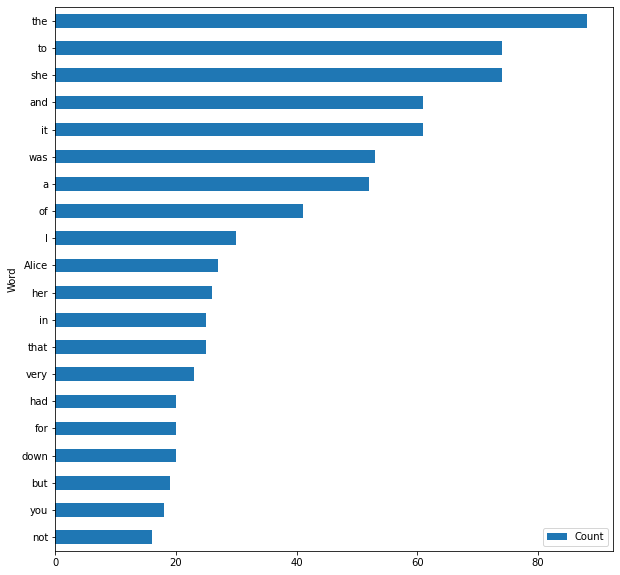

In [26]:
df = df.sort_values(by="Count")
df.plot.barh(figsize=(10,10))

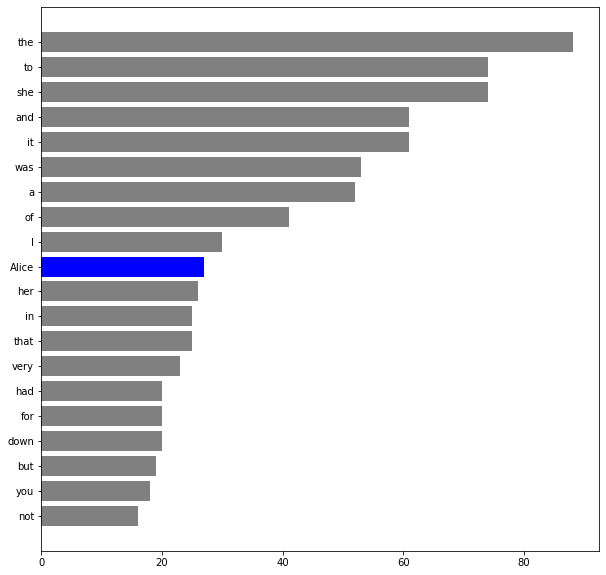

In [27]:
plt.figure(figsize=(10,10))
plt.barh(df.index, df["Count"], color=df["Color"])
plt.show()

----

## Iris Data Set

About [Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


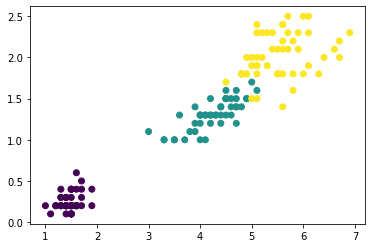

In [28]:
iris = pd.read_csv('iris.csv',delimiter=',')

print(iris.describe())

iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)

plt.show()

## Plotting Iris data in 3D chart

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


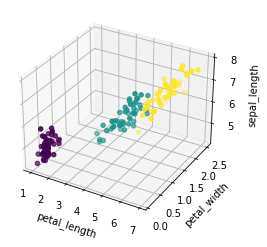

In [29]:
from mpl_toolkits.mplot3d import Axes3D

iris = pd.read_csv('iris.csv',delimiter=',')

print(iris.describe())

iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris.petal_length, iris.petal_width, iris.sepal_length, c=iris.species)

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length')

plt.show()

----

## Using Yahoo Finance

https://github.com/ranaroussi/yfinance


First, we will need to install `yfinance` from pip.

In [30]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


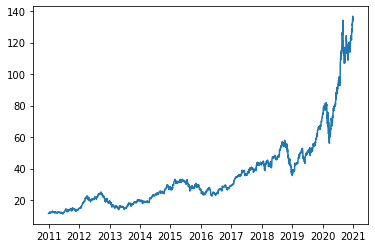

In [31]:
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download("AAPL", start="2011-01-01", end="2020-12-31")

plt.plot(data.Close)

plt.show()

[*********************100%***********************]  1 of 1 completed


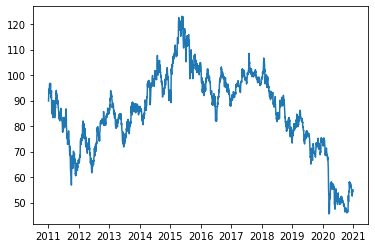

In [32]:
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download("0001.HK", start="2011-01-01", end="2020-12-31")

plt.plot(data.Close)

plt.show()

We can use `Ticker` to get details on a specific stock.

The following code examples are from yfinance documentation.

In [33]:
import yfinance as yf

stock = yf.Ticker("0001.HK")

In [34]:
stock

yfinance.Ticker object <0001.HK>

In [35]:
# get historical market data
stock.history(period="max")

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2000-01-04  32.631757  32.958065  31.979136  31.979136   3194413        0.0   
2000-01-05  30.510680  31.000166  29.613340  29.776472   6058531        0.0   
2000-01-06  30.021239  30.184371  27.736984  28.308060  10440480        0.0   
2000-01-07  28.715942  29.042253  28.226457  28.879074   6049796        0.0   
2000-01-10  29.858052  30.347541  29.123846  29.123846   5195405        0.0   
...               ...        ...        ...        ...       ...        ...   
2021-01-15  57.950001  57.950001  56.700001  56.849998   6439995        0.0   
2021-01-18  57.049999  57.400002  56.549999  57.150002   4504241        0.0   
2021-01-19  57.150002  58.349998  56.650002  58.200001   8357330        0.0   
2021-01-20  58.099998  58.200001  57.150002  57.750000   7284164        0.0   
2021-01-21  58.049999  58.099998  56.900002  57.549999   6050077        0.0   

            Stock Splits  
Date                      
2000-01-04             0  
2000-01-05             0  
2000-01-06             0  
2000-01-07             0  
2000-01-10             0  
...                  ...  
2021-01-15             0  
2021-01-18             0  
2021-01-19             0  
2021-01-20             0  
2021-01-21             0  

[5255 rows x 7 columns]

In [36]:
# show dividends
stock.dividends

Date
2000-05-16    1.050
2000-10-10    0.380
2001-05-15    1.220
2001-10-09    0.380
2002-05-14    1.220
2002-10-08    0.380
2003-05-13    1.220
2003-10-07    0.380
2004-05-11    1.300
2004-10-05    0.380
2005-05-10    1.420
2005-10-04    0.420
2006-05-09    1.580
2006-10-03    0.460
2007-05-08    1.740
2007-10-02    0.500
2008-05-13    1.950
2008-09-29    0.500
2009-05-12    1.950
2009-09-24    0.500
2010-05-18    2.200
2010-09-10    0.500
2011-05-11    2.450
2011-09-14    0.530
2012-05-30    2.630
2012-09-11    0.530
2013-05-24    2.630
2013-09-03    0.580
2014-05-21    2.900
2014-09-01    0.638
2015-03-11    3.016
2015-03-16    3.016
2015-09-22    0.700
2016-05-18    1.850
2016-09-09    0.735
2017-05-16    1.945
2017-09-04    0.780
2018-05-15    2.070
2018-09-03    0.870
2019-05-21    2.300
2019-09-02    0.870
2020-05-19    2.300
2020-09-07    0.614
Name: Dividends, dtype: float64

In [37]:
# show splits
stock.splits

Series([], Name: Stock Splits, dtype: int64)

If the stock is US Stock, we can access to more information

In [38]:
stock = yf.Ticker("AAPL")

In [39]:
# show next event (earnings, etc)
stock.calendar

Value
Earnings Date     2021-01-27 00:00:00
Earnings Average                  1.4
Earnings Low                     1.23
Earnings High                    1.57
Revenue Average          102620000000
Revenue Low               97739000000
Revenue High             110211000000

In [40]:
# show options expirations
stock.options

('2021-01-22',
 '2021-01-29',
 '2021-02-05',
 '2021-02-12',
 '2021-02-19',
 '2021-02-26',
 '2021-03-19',
 '2021-04-16',
 '2021-06-18',
 '2021-07-16',
 '2021-09-17',
 '2022-01-21',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17')

In [41]:
# get option chain for specific expiration

opt = stock.option_chain('2021-01-22')
# data available via: opt.calls, opt.puts

In [42]:
opt.calls

contractSymbol       lastTradeDate  strike  lastPrice  bid  ask  \
0   AAPL210122C00065000 2021-01-20 19:51:39    65.0      67.30  0.0  0.0   
1   AAPL210122C00070000 2021-01-19 14:30:00    70.0      62.20  0.0  0.0   
2   AAPL210122C00075000 2021-01-15 20:43:11    75.0      57.20  0.0  0.0   
3   AAPL210122C00080000 2021-01-12 20:05:49    80.0      49.17  0.0  0.0   
4   AAPL210122C00085000 2021-01-20 15:07:17    85.0      45.30  0.0  0.0   
..                  ...                 ...     ...        ...  ...  ...   
66  AAPL210122C00180000 2021-01-19 16:51:25   180.0       0.01  0.0  0.0   
67  AAPL210122C00185000 2021-01-19 14:31:41   185.0       0.01  0.0  0.0   
68  AAPL210122C00190000 2021-01-19 14:30:00   190.0       0.01  0.0  0.0   
69  AAPL210122C00195000 2021-01-19 14:30:00   195.0       0.01  0.0  0.0   
70  AAPL210122C00200000 2021-01-20 19:58:40   200.0       0.01  0.0  0.0   

    change  percentChange  volume  openInterest  impliedVolatility  \
0      0.0            0.0      12             0           0.000010   
1      0.0            0.0       1             0           0.000010   
2      0.0            0.0       1             0           0.000010   
3      0.0            0.0      25             0           0.000010   
4      0.0            0.0      20             0           0.000010   
..     ...            ...     ...           ...                ...   
66     0.0            0.0       3             0           0.500005   
67     0.0            0.0       1             0           0.500005   
68     0.0            0.0      11             0           0.500005   
69     0.0            0.0       4             0           0.500005   
70     0.0            0.0      15             0           0.500005   

    inTheMoney contractSize currency  
0         True      REGULAR      USD  
1         True      REGULAR      USD  
2         True      REGULAR      USD  
3         True      REGULAR      USD  
4         True      REGULAR      USD  
..         ...          ...      ...  
66       False      REGULAR      USD  
67       False      REGULAR      USD  
68       False      REGULAR      USD  
69       False      REGULAR      USD  
70       False      REGULAR      USD  

[71 rows x 14 columns]

In [43]:
opt.puts

contractSymbol       lastTradeDate  strike  lastPrice  bid  ask  \
0   AAPL210122P00065000 2021-01-15 20:40:11    65.0       0.01  0.0  0.0   
1   AAPL210122P00070000 2021-01-06 14:57:48    70.0       0.01  0.0  0.0   
2   AAPL210122P00075000 2021-01-13 17:04:08    75.0       0.02  0.0  0.0   
3   AAPL210122P00080000 2021-01-13 16:49:43    80.0       0.01  0.0  0.0   
4   AAPL210122P00085000 2021-01-19 17:07:09    85.0       0.01  0.0  0.0   
..                  ...                 ...     ...        ...  ...  ...   
69  AAPL210122P00180000 2021-01-04 19:11:28   180.0      51.35  0.0  0.0   
70  AAPL210122P00185000 2020-12-30 18:40:01   185.0      50.65  0.0  0.0   
71  AAPL210122P00190000 2021-01-11 16:08:10   190.0      60.55  0.0  0.0   
72  AAPL210122P00195000 2020-12-31 20:54:58   195.0      62.45  0.0  0.0   
73  AAPL210122P00200000 2021-01-19 05:13:41   200.0      71.65  0.0  0.0   

    change  percentChange  volume  openInterest  impliedVolatility  \
0      0.0            0.0     1.0             0           0.500005   
1      0.0            0.0     1.0             0           0.500005   
2      0.0            0.0     3.0             0           0.500005   
3      0.0            0.0    20.0             0           0.500005   
4      0.0            0.0     4.0             0           0.500005   
..     ...            ...     ...           ...                ...   
69     0.0            0.0     NaN             0           0.000010   
70     0.0            0.0   220.0             0           0.000010   
71     0.0            0.0     3.0             0           0.000010   
72     0.0            0.0     1.0             0           0.000010   
73     0.0            0.0     NaN             0           0.000010   

    inTheMoney contractSize currency  
0        False      REGULAR      USD  
1        False      REGULAR      USD  
2        False      REGULAR      USD  
3        False      REGULAR      USD  
4        False      REGULAR      USD  
..         ...          ...      ...  
69        True      REGULAR      USD  
70        True      REGULAR      USD  
71        True      REGULAR      USD  
72        True      REGULAR      USD  
73        True      REGULAR      USD  

[74 rows x 14 columns]

## Summary

In this lesson, we learned to plot the processed data by using MatPlotLib. We also explored more data set.